In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import mixture

# Data exploration   
We will explore river_data.csv  

## Loading the data  

In [3]:
river_df = pd.read_csv('river_data.csv')

print(river_df.info())
print(river_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923304 entries, 0 to 923303
Data columns (total 4 columns):
station_no     923304 non-null int64
date           923304 non-null object
discharge      923304 non-null float64
water_level    923304 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.2+ MB
None
         station_no      discharge    water_level
count  9.233040e+05  923304.000000  923304.000000
mean   6.482084e+06     416.427735    -484.957980
std    2.563108e+05     822.960147     592.618697
min    6.335020e+06    -999.000000    -999.000000
25%    6.335116e+06      10.530000    -999.000000
50%    6.335430e+06      58.292500    -999.000000
75%    6.435060e+06     433.239000     122.283250
max    6.935540e+06   11885.000000    1064.000000


## Enhanced/additional features  

We will use date column as index to visualize dates easily.  

Let's convert date to actual DateTime from pandas.

We will also replace empty values back by NaN's, 
then it's easier to avoid mixing them with the real data.

In [6]:
river_df.date = pd.to_datetime(river_df.date, format='%Y-%m-%d')
river_df = river_df.set_index('date')
river_df = river_df.replace(-999.0, np.NaN)

Adding parts of date more explicitly

In [7]:
river_df['year'] = river_df.index.to_series().dt.year
river_df['month'] = river_df.index.to_series().dt.month

Let's store data of each station separately, we do not want to mix them

In [5]:
stations = set(river_df.station_no.tolist())
print(stations)

if not os.path.exists('./stations'):
    os.makedirs('./stations')

for s in stations:
    station_pd = river_df[river_df.station_no == s].copy()
    
    station_pd['delta1'] = station_pd.water_level.shift(1) - station_pd.water_level
    station_pd['delta2'] = station_pd.water_level.shift(2) - station_pd.water_level
    station_pd['delta3'] = station_pd.water_level.shift(3) - station_pd.water_level
    
    station_pd.to_csv(f'./stations/station_{s}_river_data.csv')

{6935300, 6335621, 6935301, 6935302, 6335240, 6335115, 6335116, 6335500, 6935051, 6935053, 6935054, 6935055, 6935060, 6335125, 6335640, 6935460, 6335400, 6335020, 6335150, 6335410, 6336050, 6335030, 6335031, 6335032, 6335800, 6335170, 6335045, 6335301, 6335302, 6335304, 6335050, 6335180, 6935500, 6335310, 6335060, 6335190, 6335450, 6335070, 6335710, 6335200, 6335076, 6335460, 6335080, 6335081, 6335082, 6335083, 6935020, 6935145, 6935400, 6935401, 6335600, 6335601, 6335602, 6335603, 6335604, 6335730, 6335350, 6335351, 6336500, 6435060, 6935540, 6335100}


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Exploring water level in Cologne  
 
In his exploration notebooks Recepcan found, that correlation between water levels in 
Cologne and Dusseldorf looks strange.   

They are strongly correlated, but in two different ways.  

So we asked the Rhine experts about that.  

According to the information from the experts,  
the baseline measurement of water_level shifted at some point in the past.   

Let's check that and find, how to fix that.  

We will start from getting the corresponding data.  

In [9]:
koln_df = river_df[river_df.station_no == 6335060]
print(koln_df.head())

dusseldorf_df = river_df[river_df.station_no == 6335050]

            station_no  discharge  water_level  year  month
date                                                       
1965-01-01     6335060     1240.0        110.0  1965      1
1965-01-02     6335060     1680.0        178.0  1965      1
1965-01-03     6335060     1820.0        200.0  1965      1
1965-01-04     6335060     1790.0        195.0  1965      1
1965-01-05     6335060     1800.0        196.0  1965      1


Let's check if any shifts become obvious on the water_level graphic

Text(0, 0.5, 'Water level in Cologne')

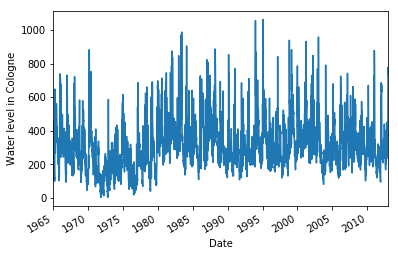

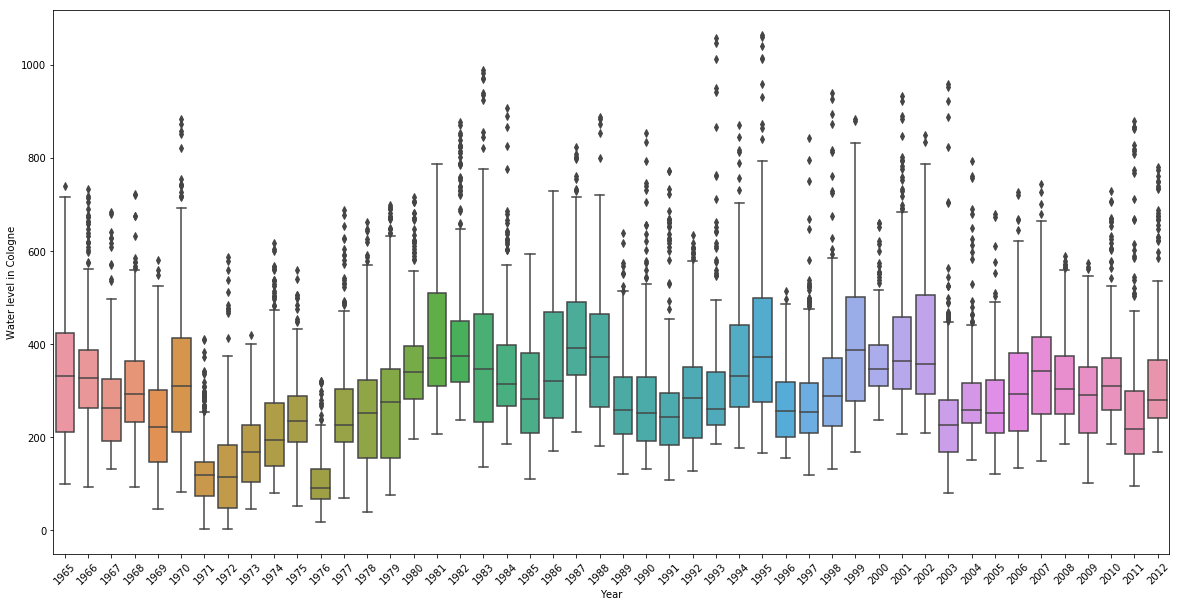

In [24]:
koln_df.water_level.plot()
plt.xlabel("Date")
plt.ylabel("Water level in Cologne")

plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(y='water_level', x='year', data=koln_df)
plt.xlabel("Year")
plt.ylabel("Water level in Cologne")

- no, it's hard to choose a single point of time  

Let's check correlations between water_level and discharge in Cologne.
We can also reproduce the comparison between water level in Cologne vs and in Dusseldorf. 

Text(0.5, 1.0, 'Correlation between water level and discharge in Cologne')

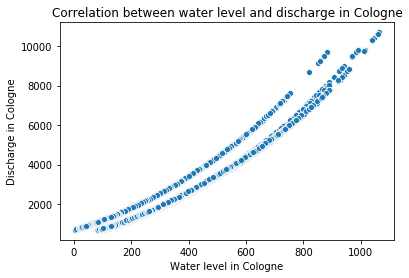

In [27]:
sns.scatterplot(x=koln_df.water_level, y=koln_df.discharge)
plt.xlabel("Water level in Cologne")
plt.ylabel("Discharge in Cologne")
plt.title("Correlation between water level and discharge in Cologne") 

Text(0.5, 1.0, 'Correlation between water level and discharge in Cologne')

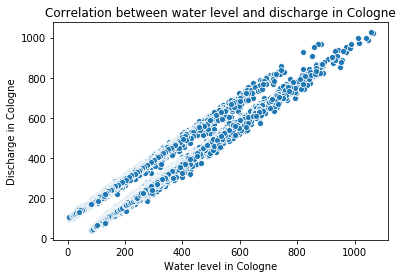

In [28]:
sns.scatterplot(x=koln_df.water_level, y=dusseldorf_df.water_level)

plt.xlabel("Water level in Cologne")
plt.ylabel("Discharge in Cologne")
plt.title("Correlation between water level and discharge in Cologne") 

- yeah, some unexplored division exists.  

We can compare it with Dusseldorf's correlations of water_level and discharge:

Text(0.5, 1.0, 'Correlation between water level and discharge in Dusseldorf')

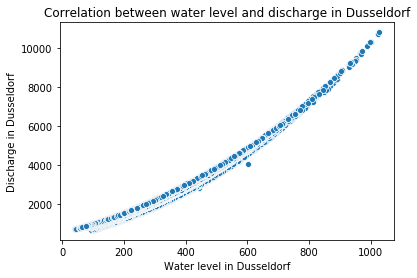

In [30]:
sns.scatterplot(x=dusseldorf_df.water_level, y=dusseldorf_df.discharge)
plt.xlabel("Water level in Dusseldorf")
plt.ylabel("Discharge in Dusseldorf")
plt.title("Correlation between water level and discharge in Dusseldorf") 

- here the points do not form 2 components as explicitly as in Cologne

Let's try to catch the 2 clusters by BayesianGaussianMixture:

Clustering means: [[333.80882386 304.298793  ]
 [239.62677694 334.96929955]]


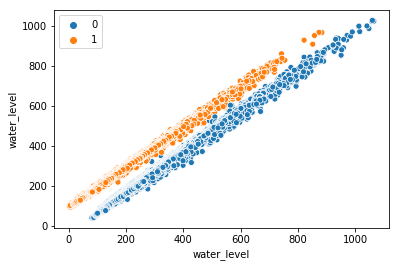

In [16]:
target = pd.concat((koln_df.water_level, dusseldorf_df.water_level), axis=1)
clustering = mixture.BayesianGaussianMixture(n_components=2,
                                        covariance_type='full').fit(target)

print('Clustering means:', clustering.means_)
clusters = clustering.predict(target)
sns.scatterplot(x=koln_df.water_level, y=dusseldorf_df.water_level, hue=clusters)

If they are somehow related to dates, we can see that by plotting year histograms for each cluster:

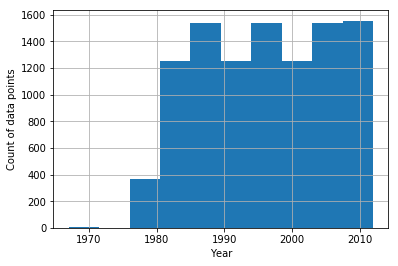

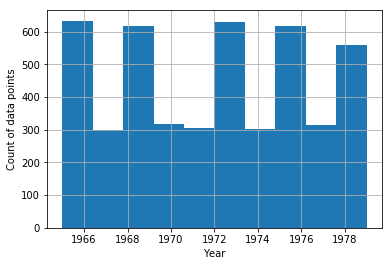

In [21]:
plt.figure()
koln_df[clusters == 0].year.hist()
plt.xlabel("Year")
plt.ylabel("Count of data points")

plt.figure()

plt.xlabel("Year")
plt.ylabel("Count of data points")
koln_df[clusters == 1].year.hist()

- ok, so the data from one cluster belongs to years 1965 - 1979, and 
other cluster is mostly in range 1979 - 2012.

So the year, when the base level changed, is 1979.

Let's try to separate the clusters further in 1979:

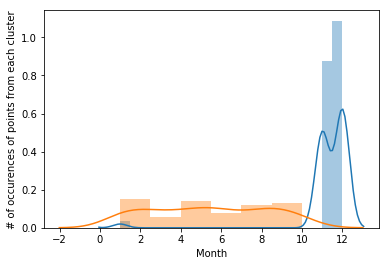

In [20]:
sns.distplot(koln_df[(clusters == 0) & (koln_df.year == 1979)].month)
sns.distplot(koln_df[(clusters == 1) & (koln_df.year == 1979)].month)


plt.xlabel("Month")
plt.ylabel("# of occurences of points from each cluster")
plt.show()

The second cluster starts on November.
Let's check, if that information is enough to separate the data:

Text(0.5, 1.0, 'Correlation between water levels in Cologne and Dusseldorf')

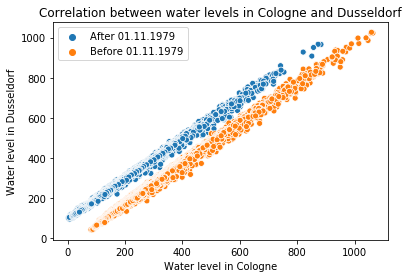

In [18]:
target_year = 1979
target_month = 11

old_level_dates = (koln_df.year < target_year) | ((koln_df.year == target_year) & (koln_df.month < target_month))
legends = ['Before 01.11.1979', 'After 01.11.1979']

hue_labels = [legends[int(x)] for x in old_level_dates.values]

sns.scatterplot(x=koln_df.water_level, y=dusseldorf_df.water_level, hue=hue_labels)

plt.xlabel("Water level in Cologne")
plt.ylabel("Water level in Dusseldorf")
plt.title("Correlation between water levels in Cologne and Dusseldorf") 

By looking to the mean values of clusters we can guess, that the baseline was increased to 1 meter.  

Let's fix the value and check the plot again:

Text(0.5, 1.0, 'Correlation between water level and discharge in Cologne')

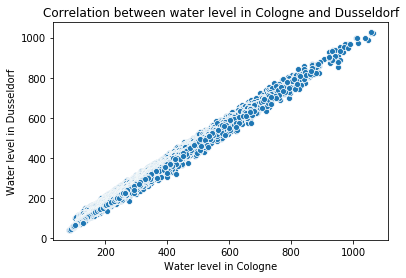

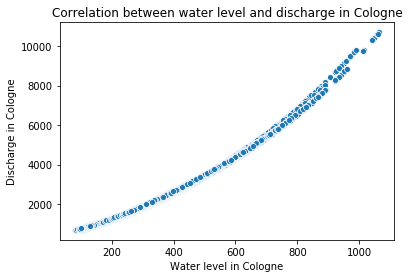

In [32]:
koln_df_fixed = koln_df.copy()

koln_df_fixed.loc[old_level_dates, 'water_level'] += 100

sns.scatterplot(x=koln_df_fixed.water_level, y=dusseldorf_df.water_level)
plt.xlabel("Water level in Cologne")
plt.ylabel("Water level in Dusseldorf")
plt.title("Correlation between water level in Cologne and Dusseldorf") 

plt.figure()
sns.scatterplot(x=koln_df_fixed.water_level, y=koln_df_fixed.discharge)
plt.xlabel("Water level in Cologne")
plt.ylabel("Discharge in Cologne")
plt.title("Correlation between water level and discharge in Cologne") 

- now correlation plots look better.  

Let's save our result:

In [ ]:
koln_df_fixed['delta1'] = koln_df_fixed.water_level.shift(1) - koln_df_fixed.water_level
koln_df_fixed['delta2'] = koln_df_fixed.water_level.shift(2) - koln_df_fixed.water_level
koln_df_fixed['delta3'] = koln_df_fixed.water_level.shift(3) - koln_df_fixed.water_level

koln_df_fixed.to_csv(f'./stations/station_6335060_river_data.csv')

print('Fixing the river_data.csv')
old_level_dates = (river_df.year < target_year) | ((river_df.year == target_year) & (river_df.month < target_month))

river_df.loc[(river_df.station_no == 6335060) & old_level_dates, 'water_level'] += 100

river_df.to_csv('river_data_cologne_fixed.csv')

We can see, how it affected the water_level plot, with which we started:

Text(0, 0.5, 'Water level in Cologne')

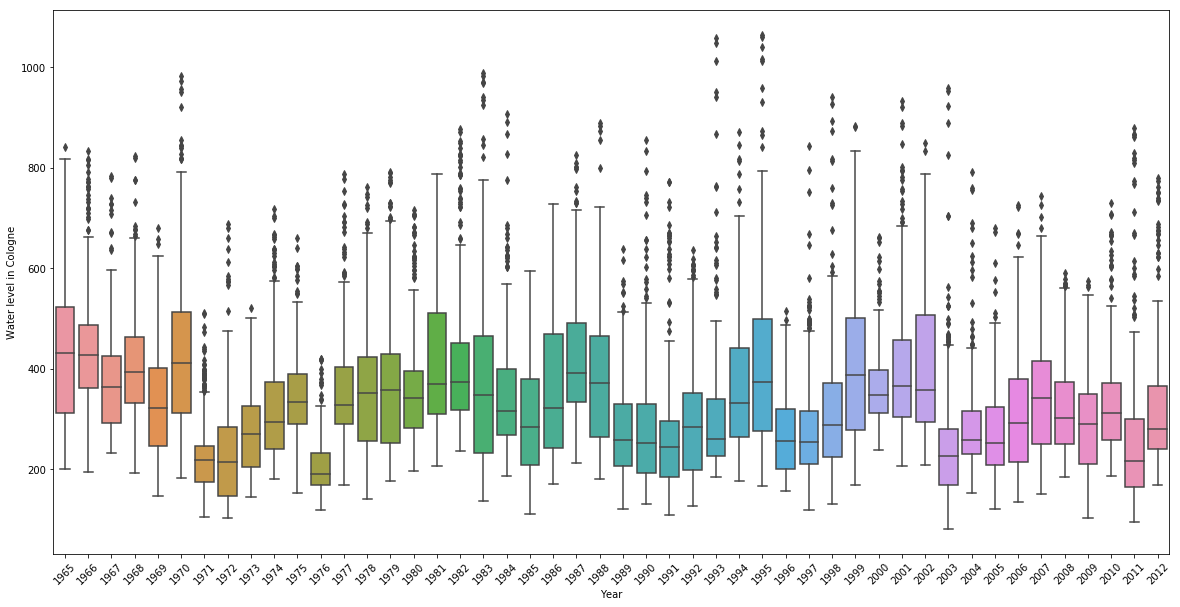

In [33]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
sns.boxplot(y='water_level', x='year', data=koln_df_fixed)
plt.xlabel("Year")
plt.ylabel("Water level in Cologne")